In [74]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from ipyleaflet import Map, Marker, MarkerCluster
from IPython.display import display, Markdown

<center>
    <h1>
    <strong>Project #4: Advanced Analysis</strong>
    <br/>
    </h1>
    <h5>
        <strong>Collaborators</strong>: Eric F, Rusty B, Sam L<br/><br/>
    </h5>
</center>
    <h5>
        Description: For our Project #4 we aimed to deliver an analysis describing the combative epicenters of the ongoing conflict in Ukraine, 
        then using our knowledge of these points generate locations for humanitarian efforts so they may serve the most people with minimal risk to their own facilities.
        We accomplished this with ____, _______, and _______.
    </h5>


<center><h2><strong>Data Sources</strong></h2></center>
<ul>
    <li>Source 1 Lorem ipsum dolor sit amet consectetur adipisicing elit. Debitis similique ab facilis libero quia deserunt quaerat omnis fugiat dolor eius inventore quas.</li>
    <li>Source 2 Lorem ipsum dolor sit amet consectetur adipisicing elit. Ducimus quidem ut quod, reprehenderit, nostrum mollitia sapiente error ipsum eum totam officiis.</li>
    <li>Source 3 Lorem ipsum dolor sit amet consectetur adipisicing elit. Cupiditate libero commodi nisi voluptates quod tempore tenetur facilis delectus incidunt recusandae.</li>
    <li>Source 4 Lorem ipsum dolor sit amet consectetur adipisicing elit. Dolore veniam maxime qui nobis cumque possimus ab soluta consequuntur deleniti necessitatibus.</li>
</ul>


In [76]:
#Reading and Cleaning Data
acled_data = pd.read_csv('./ACLED_DATA_PREVIOUSYEAR.csv') 
gdf = gpd.GeoDataFrame(
    acled_data, geometry=gpd.points_from_xy(acled_data.longitude, acled_data.latitude), crs="EPSG:4326"
)
filtered_gdf = gdf[gdf['fatalities']>0]
ua = gpd.read_file("./ua.json")
roads = gpd.read_file("./Ukraine_-_roads/Ukraine_-_roads.shp")
roads.to_crs("EPSG:4326")


,FID,MED_DESCRI,RTT_DESCRI,F_CODE_DES,ISO,ISOCOUNTRY,Shape__Len,geometry
0,1,Unknown,Unknown,Road,UKR,UKRAINE,39558.773041,"LINESTRING (38.58720 49.09414, 38.58469 49.086..."
1,2,Unknown,Unknown,Road,UKR,UKRAINE,7772.898511,"LINESTRING (26.93383 49.08428, 26.93942 49.091..."
2,3,Without Median,Secondary Route,Road,UKR,UKRAINE,32925.829008,"LINESTRING (30.94397 49.08350, 30.93869 49.084..."
3,4,Without Median,Secondary Route,Road,UKR,UKRAINE,12410.778666,"LINESTRING (38.82147 49.08294, 38.82214 49.113..."
4,5,Without Median,Secondary Route,Road,UKR,UKRAINE,17061.784837,"LINESTRING (33.77845 49.17197, 33.76989 49.169..."
...,...,...,...,...,...,...,...,...
6790,6791,Without Median,Primary Route,Road,UKR,NaN,121.576594,"LINESTRING (26.80669 48.25084, 26.80674 48.25011)"
6791,6792,Without Median,Primary Route,Road,UKR,NaN,1752.601947,"LINESTRING (22.87774 47.98843, 22.86856 47.97987)"
6792,6793,Without Median,Primary Route,Road,UKR,NaN,2261.958812,"LINESTRING (28.37478 45.52785, 28.36043 45.51777)"
6793,6794,Without Median,Primary Route,Road,UKR,NaN,3325.456951,"LINESTRING (28.35388 45.51840, 28.35128 45.524..."


<center><h2><strong>Final Plot</strong></h2></center>

<center><h2><strong>Previous Iterations</strong></h2></center>

In [77]:
def maximum_coverage(demand_points, facility_locations, num_facilities, service_radius):
    """
    Implements the maximum coverage algorithm.

    Args:
        demand_points: GeoDataFrame with demand points.
        facility_locations: GeoDataFrame with candidate facility locations.
        num_facilities: Number of facilities to select.
        service_radius: Service radius around each facility.

    Returns:
        GeoDataFrame of selected facilities.
    """

    selected_facilities = []
    covered_demand = []

    for _ in range(num_facilities):
        max_coverage = 0
        best_facility = None

        for _, facility in facility_locations.iterrows():
            if facility.geometry in selected_facilities:
                continue

            service_area = facility.geometry.buffer(service_radius)
            covered = demand_points[demand_points.geometry.within(service_area)]
            coverage = covered.shape[0]

            if coverage > max_coverage:
                max_coverage = coverage
                best_facility = facility

        if best_facility is not None:
            selected_facilities.append(best_facility.geometry)
            covered_demand.extend(covered_demand)

    return gpd.GeoDataFrame(geometry=selected_facilities, crs="EPSG:4326")

Total points: 6795


<Axes: title={'center': 'maximum coverage points'}>

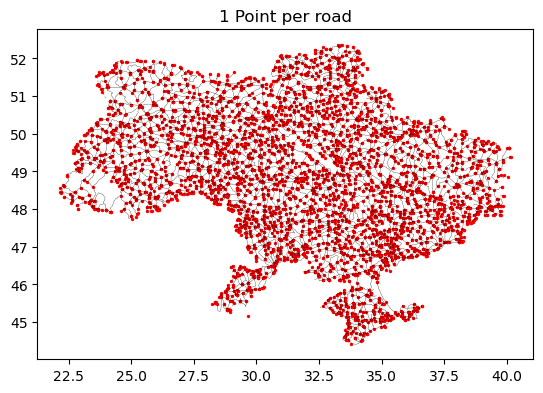

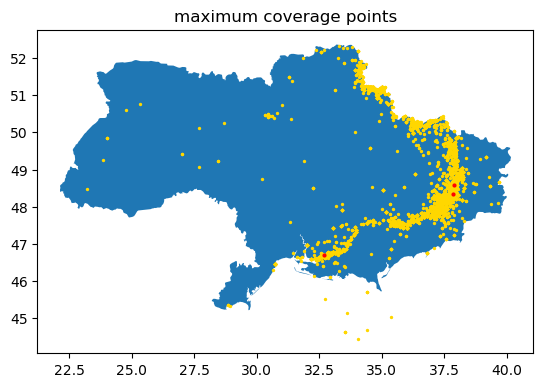

In [78]:
points = []

for index, row in roads.to_crs(filtered_gdf.crs).iterrows():    
    distances = np.linspace(0, row['geometry'].length, 1)
    points.extend([row['geometry'].interpolate(distance) for distance in distances])

print("Total points: " + str(len(points)))

points_gdf = gpd.GeoDataFrame({'geometry': points})

f, ax = plt.subplots()
ax.title.set_text("1 Point per road")
points_gdf.plot(ax=ax, markersize=2, color="RED")
roads.to_crs(filtered_gdf.crs).plot(ax=ax,linewidth=0.2, edgecolor='black')

places = maximum_coverage(filtered_gdf, points_gdf, 3, .1) # .05 for the service_radius is a radius of ~5km

f, ax = plt.subplots()
ax.title.set_text("maximum coverage points")
ua.plot(ax=ax)
filtered_gdf.plot(ax=ax, color="gold", markersize=2)
places.to_crs(ua.crs).plot(ax=ax, color="red", markersize=4)

<center><h2><strong>Conclusions</strong></h2></center>

<center><h2><strong>Literature Engagements</strong></h2></center>

<img src="./Screenshot 2024-12-04 at 1.21.26 PM.png"/>

<h5>Murray, A. T., & Tong, D. (2007). Coverage optimization in continuous space facility siting. International Journal of Geographical Information Science, 21(7), 757–776. https://doi.org/10.1080/13658810601169857</h5>

<br/>
<br/>

<h2>In this article they explored coverage optimization and ways of presenting how more points may reduce the return on investment of individual points being added. Although this didn't end up having much of an effect on our submission we had been trying to find ways to present proof of optimal positionaing and we had explored employing a graphic similar to this one.</h2>